In [ ]:
# Clustering Analysis

In [1]:
# Data Preprocessing:

In [18]:
import pandas as pd


In [20]:
df=pd.read_csv('EastWestAirlines.csv')

In [22]:
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [24]:
df.isnull().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [26]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [32]:

df.dtypes

ID#                  int64
Balance              int64
Qual_miles           int64
cc1_miles            int64
cc2_miles            int64
cc3_miles            int64
Bonus_miles          int64
Bonus_trans          int64
Flight_miles_12mo    int64
Flight_trans_12      int64
Days_since_enroll    int64
Award?               int64
dtype: object

In [38]:
from sklearn.impute import SimpleImputer

In [40]:
imputer = SimpleImputer(strategy='mean')

In [46]:
data_imputed=imputer.fit_transform(df) # Handle missing values using mean imputation

In [48]:
data_imputed

array([[1.0000e+00, 2.8143e+04, 0.0000e+00, ..., 0.0000e+00, 7.0000e+03,
        0.0000e+00],
       [2.0000e+00, 1.9244e+04, 0.0000e+00, ..., 0.0000e+00, 6.9680e+03,
        0.0000e+00],
       [3.0000e+00, 4.1354e+04, 0.0000e+00, ..., 0.0000e+00, 7.0340e+03,
        0.0000e+00],
       ...,
       [4.0190e+03, 7.3597e+04, 0.0000e+00, ..., 0.0000e+00, 1.4020e+03,
        1.0000e+00],
       [4.0200e+03, 5.4899e+04, 0.0000e+00, ..., 1.0000e+00, 1.4010e+03,
        0.0000e+00],
       [4.0210e+03, 3.0160e+03, 0.0000e+00, ..., 0.0000e+00, 1.3980e+03,
        0.0000e+00]])

In [50]:
# Removing Outliers : Outliers are removed from the dataset using the Z-score method.

In [52]:
from scipy import stats

In [58]:
z_score=stats.zscore(data_imputed) # Calculate the Z-scores

In [60]:
z_score

array([[-1.73512503e+00, -4.51140783e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-1.73426342e+00, -5.39456874e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-1.73340181e+00, -3.20031232e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [ 1.72682006e+00, -4.29480975e-05, -1.86298687e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [ 1.72768167e+00, -1.85606976e-01, -1.86298687e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [ 1.72854328e+00, -7.00507951e-01, -1.86298687e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [64]:
# Remove outliers (|Z-score| > 3)
data_clean = data_imputed[(z_score < 3).all(axis=1)]

In [66]:
data_clean

array([[1.0000e+00, 2.8143e+04, 0.0000e+00, ..., 0.0000e+00, 7.0000e+03,
        0.0000e+00],
       [2.0000e+00, 1.9244e+04, 0.0000e+00, ..., 0.0000e+00, 6.9680e+03,
        0.0000e+00],
       [3.0000e+00, 4.1354e+04, 0.0000e+00, ..., 0.0000e+00, 7.0340e+03,
        0.0000e+00],
       ...,
       [4.0190e+03, 7.3597e+04, 0.0000e+00, ..., 0.0000e+00, 1.4020e+03,
        1.0000e+00],
       [4.0200e+03, 5.4899e+04, 0.0000e+00, ..., 1.0000e+00, 1.4010e+03,
        0.0000e+00],
       [4.0210e+03, 3.0160e+03, 0.0000e+00, ..., 0.0000e+00, 1.3980e+03,
        0.0000e+00]])

In [68]:
# Scaling Features : The features are scaled using the StandardScaler.
from sklearn.preprocessing import StandardScaler

In [70]:
# Scale the features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_clean)

In [72]:
scaler

StandardScaler()

In [74]:
data_scaled

array([[-1.76632543, -0.52326043, -0.15886912, ..., -0.43177507,
         1.43143767, -0.71809304],
       [-1.76546049, -0.66708419, -0.15886912, ..., -0.43177507,
         1.41584783, -0.71809304],
       [-1.76459555, -0.30974703, -0.15886912, ..., -0.43177507,
         1.44800188, -0.71809304],
       ...,
       [ 1.70900444,  0.21135753, -0.15886912, ..., -0.43177507,
        -1.29581034,  1.3925772 ],
       [ 1.70986938, -0.0908356 , -0.15886912, ...,  0.11817002,
        -1.29629752, -0.71809304],
       [ 1.71073432, -0.9293577 , -0.15886912, ..., -0.43177507,
        -1.29775907, -0.71809304]])

In [76]:
## EDA

In [78]:
import matplotlib.pyplot as plt

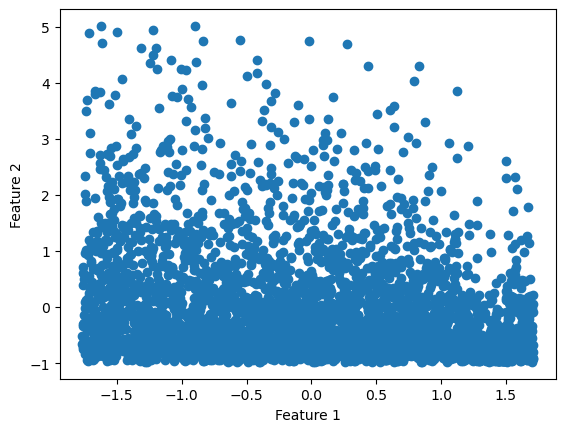

In [80]:
# Scatter plot of two features
plt.scatter(data_scaled[:, 0], data_scaled[:, 1])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

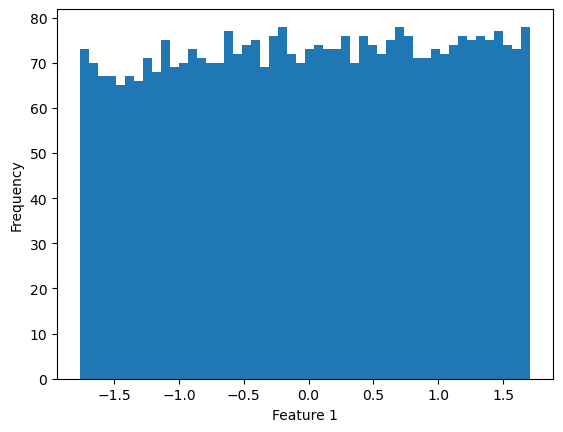

In [82]:
# Histogram of a feature

plt.hist(data_scaled[:, 0], bins=50)
plt.xlabel('Feature 1')
plt.ylabel('Frequency')
plt.show()


In [84]:
# Elbow Curve
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [86]:
# Calculate WCSS for different cluster numbers(with in cluster sum of squares-WCSS)
wcss = []
for i in range(1, 11):  # Check for 1 to 10 clusters
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)


In [91]:
kmeans

KMeans(n_clusters=10, random_state=42)

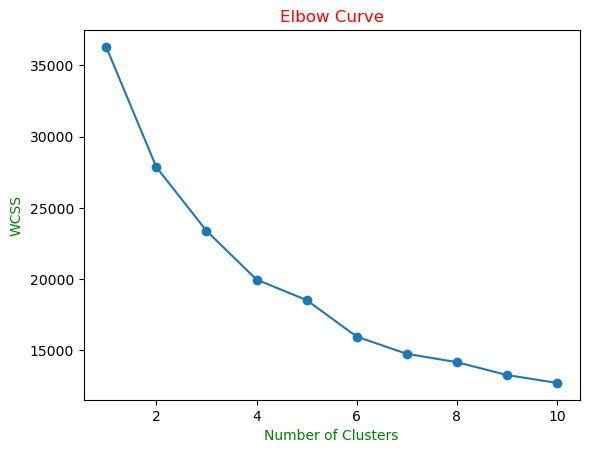

In [93]:
# Plot the elbow curve
plt.plot(range(1, 11), wcss, marker='o')  # Added markers for better visualization
plt.title('Elbow Curve',color='red')
plt.xlabel('Number of Clusters',color='green')
plt.ylabel('WCSS',color='green')
plt.show()


In [97]:
# Implementing Clustering Algorithms
# K-Means Clustering

In [99]:
from sklearn.cluster import KMeans

In [109]:
# Initialize the K-Means algorithm
kmeans = KMeans(n_clusters=3, random_state=42)

In [111]:
# Fit the algorithm to the data
kmeans.fit(data_scaled)


KMeans(n_clusters=3, random_state=42)

In [113]:
# Get the cluster labels
labels_kmeans = kmeans.labels_

In [115]:
labels_kmeans

array([0, 0, 0, ..., 0, 0, 0])

In [117]:
## Hierarchical Clustering

In [119]:
from sklearn.cluster import AgglomerativeClustering

# Initialize the Hierarchical Clustering algorithm
hierarchical = AgglomerativeClustering(n_clusters=3, linkage='ward')

# Fit the algorithm to the data
hierarchical.fit(data_scaled)

# Get the cluster labels
labels_hierarchical = hierarchical.labels_

In [121]:
hierarchical

AgglomerativeClustering(n_clusters=3)

In [123]:
labels_hierarchical

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [126]:
# Dendograms
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt


In [128]:
# Calculate the linkage matrix
linkage_matrix = linkage(data_scaled, method='ward')


In [130]:
linkage_matrix

array([[2.40300000e+03, 2.40400000e+03, 3.29902989e-03, 2.00000000e+00],
       [3.37500000e+03, 3.37700000e+03, 5.37036588e-03, 2.00000000e+00],
       [3.33600000e+03, 3.34100000e+03, 8.79619170e-03, 2.00000000e+00],
       ...,
       [7.24300000e+03, 7.25500000e+03, 7.35449268e+01, 2.27200000e+03],
       [7.25200000e+03, 7.25300000e+03, 9.49560684e+01, 1.35800000e+03],
       [7.25600000e+03, 7.25700000e+03, 1.18256935e+02, 3.63000000e+03]])

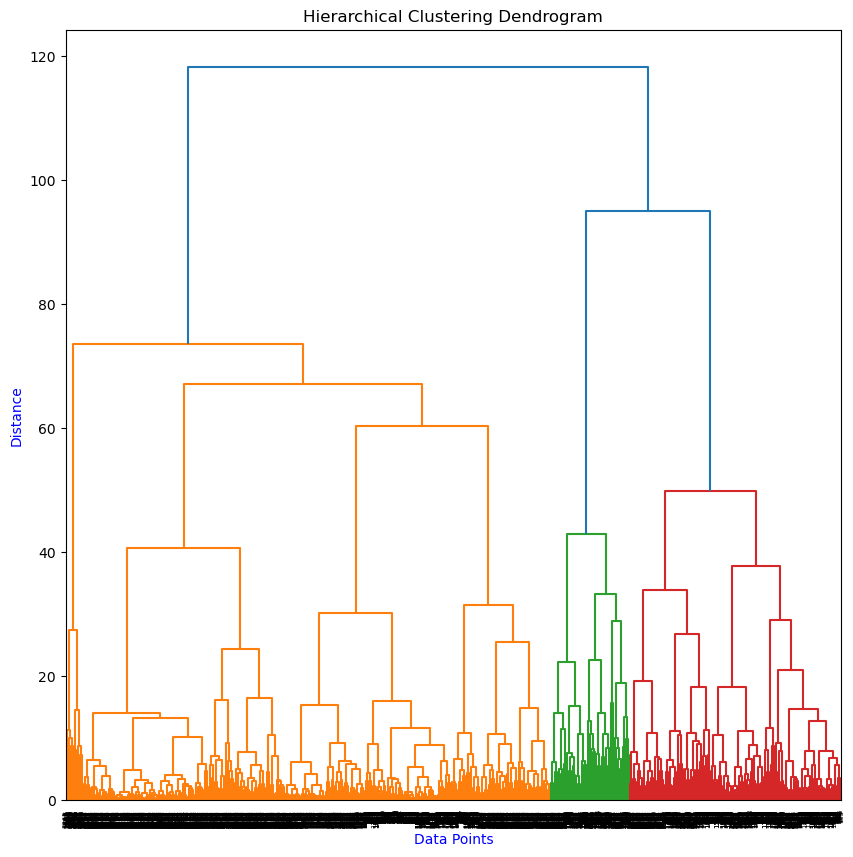

In [132]:
# Plot the dendrogram
plt.figure(figsize=(10, 10))  # Set the figure size
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points',color='blue')
plt.ylabel('Distance',color='blue')
plt.show()

In [134]:
## DBSCAN Clustering

In [136]:
from sklearn.cluster import DBSCAN

# Initialize the DBSCAN algorithm
dbscan = DBSCAN(eps=0.5, min_samples=10)

# Fit the algorithm to the data
dbscan.fit(data_scaled)

# Get the cluster labels
labels_dbscan = dbscan.labels_

In [138]:
dbscan

DBSCAN(min_samples=10)

In [140]:
labels_dbscan

array([ 0,  0,  0, ..., -1, -1,  0], dtype=int64)

In [142]:
# Cluster Analysis and Interpretation

In [164]:
# Analyzing the Clusters : The clusters generated by each clustering algorithm are analyzed, and the characteristics of each cluster are interpreted.

original_column_names = df.columns

# Analyze the clusters generated by K-Means

kcluster=pd.DataFrame(data_scaled, columns=original_column_names).groupby(labels_kmeans).mean()

# Analyze the clusters generated by Hierarchical Clustering
Hierarchicalcluster=pd.DataFrame(data_scaled, columns=original_column_names).groupby(labels_hierarchical).mean()

# Analyze the clusters generated by DBSCAN

DBSCANCluster=pd.DataFrame(data_scaled, columns=original_column_names).groupby(labels_dbscan).mean()


In [166]:
kcluster

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.249621,-0.387516,-0.049571,-0.614535,0.0,0.0,-0.569651,-0.520842,-0.250750,-0.242700,-0.259350,-0.322102
1,-0.100947,0.592335,0.481406,0.014163,0.0,0.0,0.263982,0.661813,3.032057,2.973064,0.127168,0.602127
2,-0.441953,0.593668,-0.010122,1.137754,0.0,0.0,1.001431,0.826419,-0.177852,-0.180279,0.454448,0.470163


In [168]:
Hierarchicalcluster

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.261997,-0.336749,0.041959,-0.496521,0.0,0.0,-0.482617,-0.412047,-0.309911,-0.314137,-0.267939,-0.227585
1,-0.593244,0.664499,-0.144771,1.201285,0.0,0.0,1.104861,0.815530,-0.169767,-0.159867,0.598032,0.359696
2,-0.026213,0.294432,0.128192,-0.155182,0.0,0.0,0.016195,0.353755,2.349534,2.349079,0.049868,0.436802


In [170]:
DBSCANCluster

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
-1,-0.129216,0.354892,0.094735,0.366302,0.0,0.0,0.374766,0.383957,0.239609,0.257470,0.149738,0.299187
0,0.292574,-0.629314,-0.158869,-0.755664,0.0,0.0,-0.707368,-0.758166,-0.401822,-0.431775,-0.321250,-0.718093
1,-1.202199,-0.682639,-0.158869,-0.755664,0.0,0.0,-0.730472,-1.173115,-0.401822,-0.431775,1.098344,1.392577
2,-0.938875,-0.573681,-0.158869,0.759839,0.0,0.0,0.179449,0.572507,-0.401822,-0.431775,0.881500,1.392577
3,-0.857026,0.151277,-0.158869,0.759839,0.0,0.0,0.144199,0.341994,-0.401822,-0.431775,0.797184,-0.718093
4,-0.816275,-0.838963,-0.158869,-0.755664,0.0,0.0,-0.611158,0.101308,-0.401822,-0.431775,0.760587,1.392577
5,0.242870,-0.589000,-0.158869,-0.755664,0.0,0.0,-0.684631,-0.983404,-0.401822,-0.431775,-0.273496,1.392577
6,0.401115,-0.602037,-0.158869,0.759839,0.0,0.0,0.137566,0.503161,-0.401822,-0.431775,-0.435914,1.392577
7,0.769226,-0.299062,-0.158869,0.002087,0.0,0.0,-0.352761,0.422799,-0.401822,-0.431775,-0.854933,-0.718093
8,0.718486,-0.337997,-0.158869,0.759839,0.0,0.0,0.010004,0.405845,-0.401822,-0.431775,-0.919827,-0.718093


In [172]:
# Visualization
# The clustering results are visualized using scatter plots

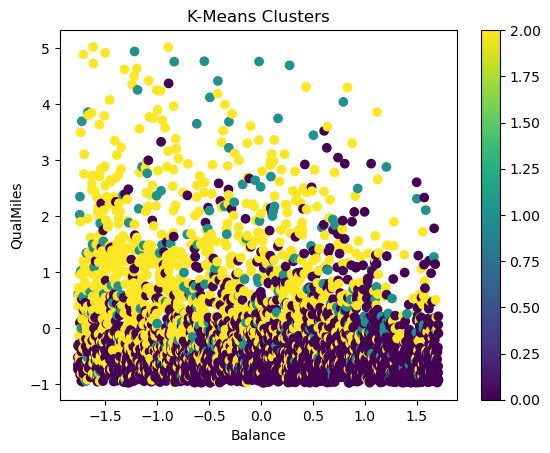

In [182]:
import matplotlib.pyplot as plt

# Visualize the K-Means clusters

plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=labels_kmeans, cmap='viridis')
plt.xlabel('Balance')
plt.ylabel('QualMiles')
plt.title('K-Means Clusters')
plt.colorbar()
plt.show()

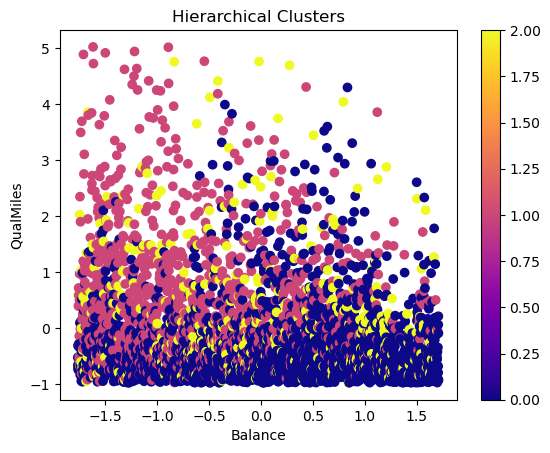

In [184]:
# Visualize the Hierarchical Clusters

plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=labels_hierarchical,cmap='plasma')
plt.xlabel('Balance')
plt.ylabel('QualMiles')
plt.title('Hierarchical Clusters')
plt.colorbar()
plt.show()

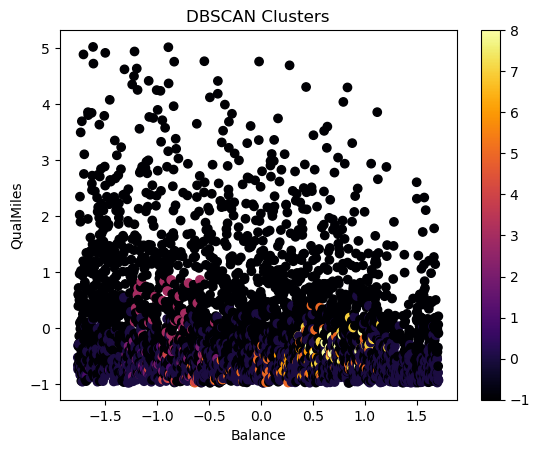

In [185]:
# Visualize the DBSCAN Clusters

plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=labels_dbscan,cmap='inferno')
plt.xlabel('Balance')
plt.ylabel('QualMiles')
plt.title('DBSCAN Clusters')
plt.colorbar()
plt.show()

In [191]:
#Evaluation and Performance Metrics

In [193]:
# Calculate the silhouette score for each clustering algorithm
from sklearn.metrics import silhouette_score
# Calculate silhouette scores for K-Means, Hierarchical, and DBSCAN
kmeans_score = silhouette_score(data_scaled, labels_kmeans)
hierarchical_score = silhouette_score(data_scaled, labels_hierarchical)
dbscan_score = silhouette_score(data_scaled, labels_dbscan)


In [195]:
kmeans_score

0.2919271083786071

In [197]:
hierarchical_score

0.2635905052685148

In [199]:
dbscan_score 

-0.24509840020139437